<a href="https://colab.research.google.com/github/Aditirk87/CarPriceDetectionOais/blob/main/CarPricePre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [ ]:
cd = pd.read_csv('car.csv')

cd.head(1)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0


In [ ]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
cd.tail(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
195,196,-1,volvo 144ea,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415.0
196,197,-2,volvo 244dl,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985.0
197,198,-1,volvo 245,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,16515.0
198,199,-2,volvo 264gl,gas,turbo,four,sedan,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18420.0
199,200,-1,volvo diesel,gas,turbo,four,wagon,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950.0
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [ ]:
cd.corr()

<ipython-input-31-3c10bf35de71>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cd.corr()


,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.125568,0.067729,0.190352,0.168295,-0.051406,0.051483,0.129729,0.170636,...,-0.033930,0.042401,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.194311,-0.059866,-0.664073,-0.398970,0.041671,0.212471,-0.531954,-0.357612,...,-0.105790,-0.043123,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
fueltype,0.125568,-0.194311,1.000000,0.401397,0.191491,0.157580,-0.132257,-0.040070,0.308346,0.212679,...,0.069594,0.537764,0.054451,0.241829,0.984356,-0.163926,-0.476883,0.255963,0.191392,0.105679
aspiration,0.067729,-0.059866,0.401397,1.000000,0.031792,0.021276,-0.066465,-0.057191,0.257611,0.234539,...,0.108217,0.357928,0.212614,0.222982,0.295541,0.241685,-0.183383,-0.202362,-0.254416,0.177926
doornumber,0.190352,-0.664073,0.191491,0.031792,1.000000,0.447534,0.098954,-0.137757,0.447357,0.398568,...,0.020742,0.059548,0.119258,-0.011082,0.177888,-0.126947,-0.247668,-0.012417,-0.036330,0.031835
carbody,0.168295,-0.398970,0.157580,0.021276,0.447534,1.000000,-0.056886,0.126546,0.368772,0.376842,...,0.172381,-0.000686,0.224976,0.000598,0.156686,0.047234,-0.147031,-0.095826,-0.126939,0.161294
drivewheel,-0.051406,0.041671,-0.132257,-0.066465,0.098954,-0.056886,1.000000,-0.147865,-0.459745,-0.485649,...,-0.524307,0.177498,-0.481827,-0.071591,-0.127479,-0.518686,0.039417,0.449581,0.452220,-0.577992
enginelocation,0.051483,0.212471,-0.040070,-0.057191,-0.137757,0.126546,-0.147865,1.000000,-0.187790,-0.050989,...,0.196826,-0.086918,0.185042,-0.138455,-0.019762,0.317839,0.198461,-0.153487,-0.102026,0.324973
wheelbase,0.129729,-0.531954,0.308346,0.257611,0.447357,0.368772,-0.459745,-0.187790,1.000000,0.874587,...,0.569329,-0.049967,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.212679,0.234539,0.398568,0.376842,-0.485649,-0.050989,0.874587,1.000000,...,0.683360,-0.123623,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920


<ipython-input-34-730b3e908ad4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = cd.corr()


<Axes: >

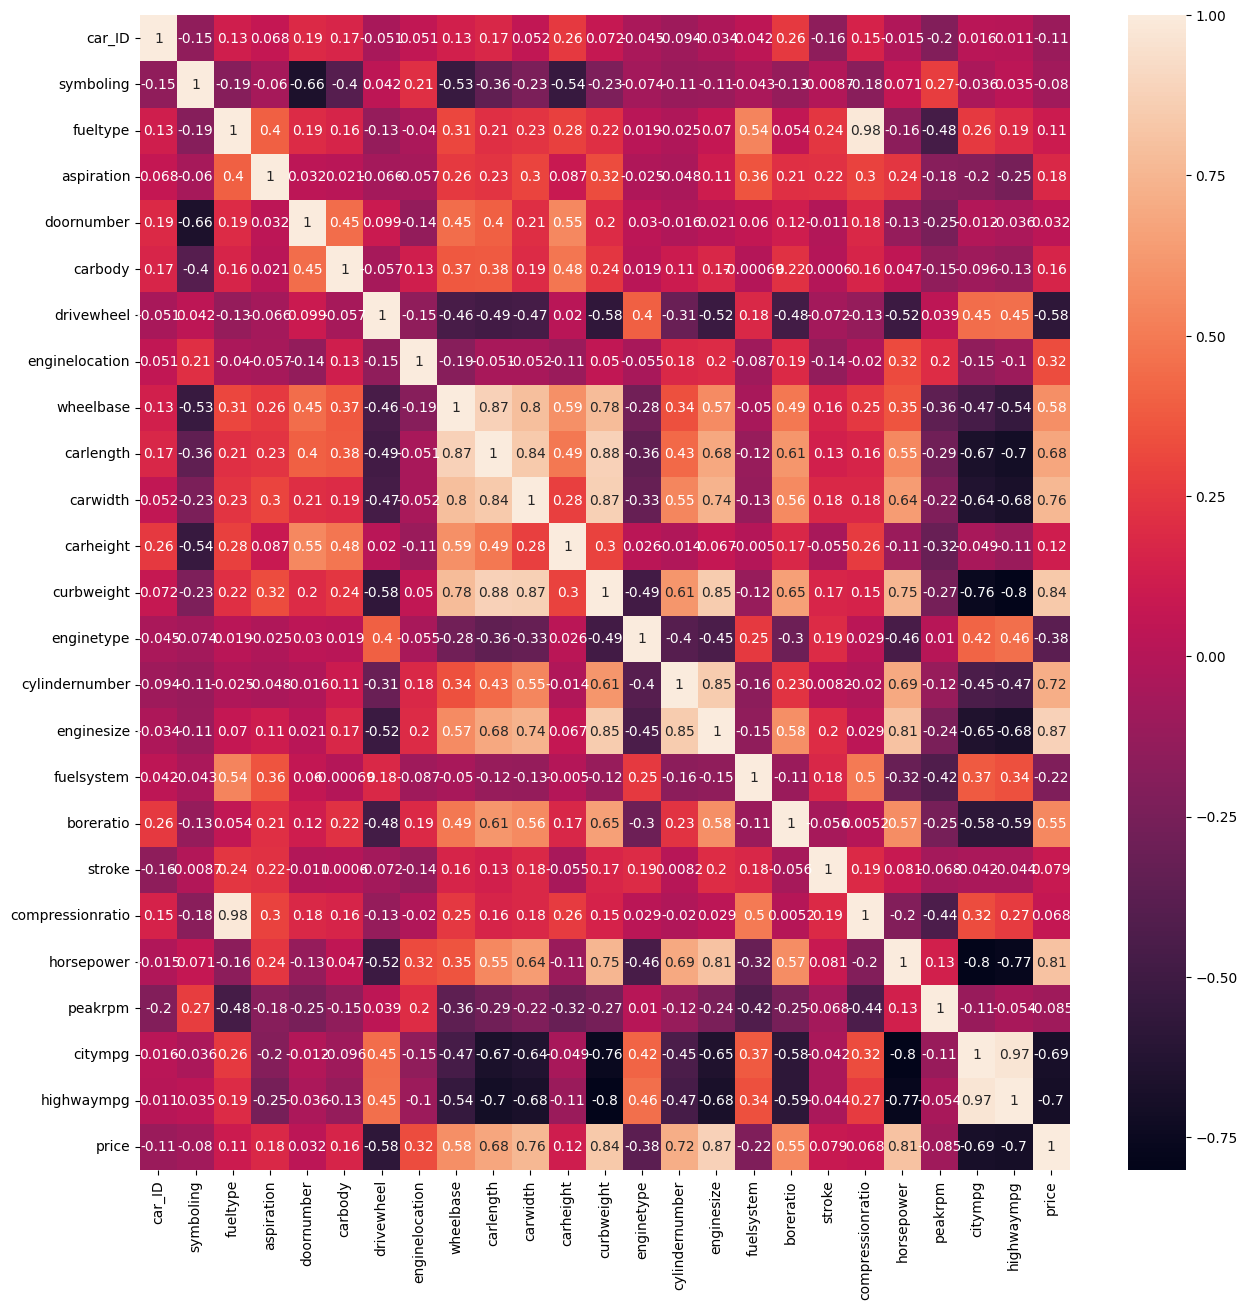

In [ ]:
corr = cd.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr, annot=True , ax=ax)

In [ ]:
cd.shape

(205, 26)

In [ ]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
cd.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


data preprocessing


In [ ]:
cd['enginetype'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [ ]:
cd['fueltype'] = cd['fueltype'].map({'gas':0 , 'diesel':1})

In [ ]:
cd['aspiration'] = cd['aspiration'].map({'std':2 , 'turbo':3})

In [ ]:
cd['carbody'] = cd['carbody'].map({'convertible':1 , 'hatchback':2 ,'sedan':3 , 'wagon':4, 'hardtop':5})

In [ ]:
cd['drivewheel'] = cd['drivewheel'].map({'rwd':2 , 'fwd':3 ,'4wd':4})

In [ ]:
cd['doornumber'] = cd['doornumber'].map({'two':2 , 'four':4})

In [ ]:
cd['enginelocation'] = cd['enginelocation'].map({'front':2 , 'rear':4})

In [ ]:
cd['enginetype'] = cd['enginetype'].map({'dohc':1 , 'ohcv':2 ,'l':3 , 'rotor':4, 'ohcf':5 , 'dohcv':6, 'ohc':7})

In [ ]:
cd['cylindernumber'] = cd['cylindernumber'].map({'four':4 , 'six':6 ,'five':5 , 'three':3, 'twelve':12 , 'two':2, 'eight':8})

In [ ]:
cd['fuelsystem'] = cd['fuelsystem'].map({'mpfi':4 , '2bbl':6 ,'mfi':5 , '1bbl':3, 'spfi':12 , '4bbl':2, 'idi':8, 'spdi':9})

In [ ]:
cd['aspiration'].unique()

array([2, 3])

In [ ]:
x = cd.drop(['CarName' , 'price'],axis=1)
y = cd['price']

In [ ]:
x

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,3,0,2,2,1,2,2,88.6,168.8,...,4,130,4,3.47,2.68,9.0,111,5000,21,27
1,2,3,0,2,2,1,2,2,88.6,168.8,...,4,130,4,3.47,2.68,9.0,111,5000,21,27
2,3,1,0,2,2,2,2,2,94.5,171.2,...,6,152,4,2.68,3.47,9.0,154,5000,19,26
3,4,2,0,2,4,3,3,2,99.8,176.6,...,4,109,4,3.19,3.40,10.0,102,5500,24,30
4,5,2,0,2,4,3,4,2,99.4,176.6,...,5,136,4,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,0,2,4,3,2,2,109.1,188.8,...,4,141,4,3.78,3.15,9.5,114,5400,23,28
201,202,-1,0,3,4,3,2,2,109.1,188.8,...,4,141,4,3.78,3.15,8.7,160,5300,19,25
202,203,-1,0,2,4,3,2,2,109.1,188.8,...,6,173,4,3.58,2.87,8.8,134,5500,18,23
203,204,-1,1,3,4,3,2,2,109.1,188.8,...,6,145,8,3.01,3.40,23.0,106,4800,26,27


In [ ]:
y


0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [ ]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    int64  
 4   aspiration        205 non-null    int64  
 5   doornumber        205 non-null    int64  
 6   carbody           205 non-null    int64  
 7   drivewheel        205 non-null    int64  
 8   enginelocation    205 non-null    int64  
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    int64  
 15  cylindernumber    205 non-null    int64  
 16  enginesize        205 non-null    int64  
 1

In [ ]:
 x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [ ]:
 lr = LinearRegression()
 lr.fit(x_train,y_train)

 rf = RandomForestRegressor()
 rf.fit(x_train,y_train)


RandomForestRegressor()

In [ ]:
y_pred1 = lr.predict(x_test)
y_pred2 = rf.predict(x_test)

In [ ]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
print(score1,score2)

0.8629559265800499 0.9587597541997652


In [ ]:
final_data =  pd.DataFrame({'model':['LR','RF'], 'R2_SCORE':[score1,score2]})

In [ ]:
final_data

,model,R2_SCORE
0,LR,0.862956
1,RF,0.958760


Text(0, 0.5, 'actual price')

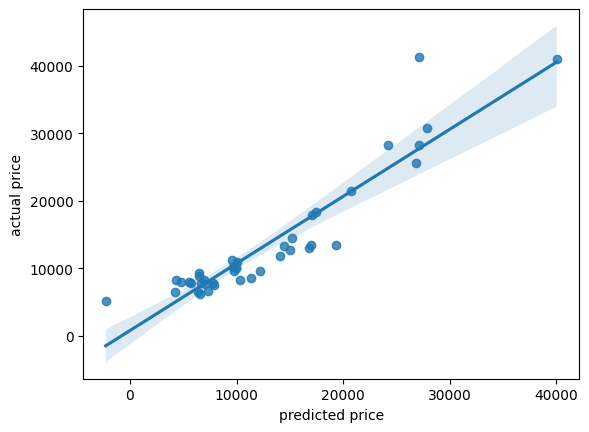

In [ ]:
#linear regression
sns.regplot(x=y_pred1, y=y_test)
plt.xlabel("predicted price")
plt.ylabel("actual price")

Text(0, 0.5, 'actual price')

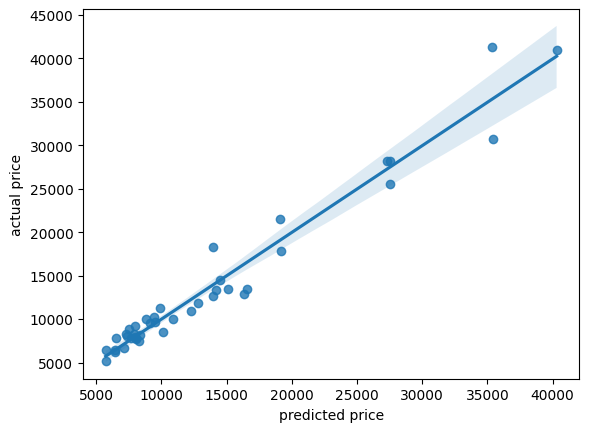

In [ ]:
#randonm forest regression
sns.regplot(x=y_pred2, y=y_test)
plt.xlabel("predicted price")
plt.ylabel("actual price")